In [1]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_drug_data_to_load = "../data/mouse_drug_data.csv"
clinical_trial_data_to_load = "../data/clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data
mouse_data_df = pd.read_csv(mouse_drug_data_to_load)
clinical_data_df = pd.read_csv(clinical_trial_data_to_load)

# Combine the data into a single dataset
clinic_mouse_df = pd.merge(clinical_data_df, mouse_data_df, how="left", on="Mouse ID")

# Display the data table for preview
clinic_mouse_df.head()


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.0,0,Capomulin
1,f932,0,45.0,0,Ketapril
2,g107,0,45.0,0,Ketapril
3,a457,0,45.0,0,Ketapril
4,c819,0,45.0,0,Ketapril


## Tumor Response to Treatment

In [2]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
group_df = clinic_mouse_df.groupby(["Drug", "Timepoint"])


# Convert to DataFrame
mean_tumor_df = group_df["Tumor Volume (mm3)"].mean()
mean_tumor_df = mean_tumor_df.reset_index()


# Preview DataFrame
mean_tumor_df.head()


,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325


In [3]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
tumor_sterr = group_df["Tumor Volume (mm3)"].sem()

# Convert to DataFrame
tumor_sterr_df = tumor_sterr.reset_index()

# Preview DataFrame
tumor_sterr_df.head()


,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731


In [13]:
# Minor Data Munging to Re-Format the Data Frames

# Preview that Reformatting worked


In [17]:
# create drugs and timepoints
drugs = clinic_mouse_df["Drug"].unique()
timepoint = [x for x in np.arange(0, 50, step=5)]

# grab all drugs by timepoint for each time in timepoint and transpose the column
tumor_times = [mean_tumor_df.iloc[[x for x in np.arange(i, len(mean_tumor_df), step=10)], [0,2]]
             for i in range(0, len(drugs))]
tumor_times = [item.set_index("Drug").T for item in tumor_times]

# append all time rows to single DataFrame
tumor_summary_df = tumor_times[0]
for i in range(1, len(tumor_times)): 
    tumor_summary_df = tumor_summary_df.append(tumor_times[i])

# create Timepoint index
tumor_summary_df["Timepoint"] = timepoint
tumor_summary_df = tumor_summary_df.set_index("Timepoint")

# Preview DataFrame
tumor_summary_df


Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334
25,39.939528,54.287674,55.715252,57.678982,56.731968,57.482574,55.504138,38.974300,56.166123,55.432935
30,38.769339,56.769517,58.299397,60.994507,59.559509,59.809063,58.196374,38.703137,59.826738,57.713531
35,37.816839,58.827548,60.742461,63.371686,62.685087,62.420615,60.350199,37.451996,62.440699,60.089372
40,36.958001,61.467895,63.162824,66.068580,65.600754,65.052675,63.045537,36.574081,65.356386,62.916692


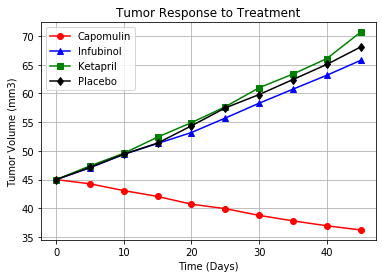

In [111]:
# Generate the Plot (with Error Bars)
plt.plot(timepoint, tumor_summary_df["Capomulin"], marker="o", color="red", label="Capomulin")
plt.plot(timepoint, tumor_summary_df["Infubinol"], marker="^", color="blue", label="Infubinol")
plt.plot(timepoint, tumor_summary_df["Ketapril"], marker="s", color="green", label="Ketapril")
plt.plot(timepoint, tumor_summary_df["Placebo"], marker ="d", color="black", label="Placebo")

plt.title("Tumor Response to Treatment")
plt.xlabel("Time (Days)")
plt.ylabel("Tumor Volume (mm3)")

plt.legend(loc="upper left")
plt.grid()
plt.show()

# Save the Figure
# plt.savefig("tumor_treatment.png")

# Show the Figure
plt.show()


## Metastatic Response to Treatment

In [64]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
mean_meta_sites = group_df["Metastatic Sites"].mean()


# Convert to DataFrame
meta_sites_df = mean_meta_sites.to_frame()


# Preview DataFrame
meta_sites_df.head()


Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.160000
          10                 0.320000
          15                 0.375000
          20                 0.652174

In [5]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 
meta_sterr = group_df["Metastatic Sites"].sem()


# Convert to DataFrame
meta_sterr_df = meta_sterr.to_frame()


# Preview DataFrame
meta_sterr_df.head()


Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.074833
          10                 0.125433
          15                 0.132048
          20                 0.161621

In [ ]:
# Minor Data Munging to Re-Format the Data Frames

# Preview that Reformatting worked


In [6]:
time0 = meta_sterr_df.iloc[[x for x in np.arange(0, len(meta_sterr_df), step=10)]]
time5 = meta_sterr_df.iloc[[x for x in np.arange(1, len(meta_sterr_df), step=10)]]
time10 = meta_sterr_df.iloc[[x for x in np.arange(2, len(meta_sterr_df), step=10)]]
time15 = meta_sterr_df.iloc[[x for x in np.arange(3, len(meta_sterr_df), step=10)]]
time20 = meta_sterr_df.iloc[[x for x in np.arange(4, len(meta_sterr_df), step=10)]]
time25 = meta_sterr_df.iloc[[x for x in np.arange(5, len(meta_sterr_df), step=10)]]
time30 = meta_sterr_df.iloc[[x for x in np.arange(6, len(meta_sterr_df), step=10)]]
time35 = meta_sterr_df.iloc[[x for x in np.arange(7, len(meta_sterr_df), step=10)]]
time40 = meta_sterr_df.iloc[[x for x in np.arange(8, len(meta_sterr_df), step=10)]]
time45 = meta_sterr_df.iloc[[x for x in np.arange(9, len(meta_sterr_df), step=10)]]

time0 = time0.reset_index().drop("Timepoint", axis=1).set_index("Drug").T
time5 = time5.reset_index().drop("Timepoint", axis=1).set_index("Drug").T
time10 = time10.reset_index().drop("Timepoint", axis=1).set_index("Drug").T
time15 = time15.reset_index().drop("Timepoint", axis=1).set_index("Drug").T
time20 = time20.reset_index().drop("Timepoint", axis=1).set_index("Drug").T
time25 = time25.reset_index().drop("Timepoint", axis=1).set_index("Drug").T
time30 = time30.reset_index().drop("Timepoint", axis=1).set_index("Drug").T
time35 = time35.reset_index().drop("Timepoint", axis=1).set_index("Drug").T
time40 = time40.reset_index().drop("Timepoint", axis=1).set_index("Drug").T
time45 = time45.reset_index().drop("Timepoint", axis=1).set_index("Drug").T

meta_by_drug_df = time0.append(time5).append(time10).append(time15).append(time20)\
    .append(time25).append(time30).append(time35).append(time40).append(time45)

meta_by_drug_df["Timepoint"] = [x for x in np.arange(0, 50, step=5)]

meta_by_drug_df = meta_by_drug_df.set_index("Timepoint")

meta_by_drug_df


Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.074833,0.108588,0.091652,0.098100,0.093618,0.100947,0.095219,0.066332,0.087178,0.077709
10,0.125433,0.152177,0.159364,0.142018,0.163577,0.115261,0.105690,0.090289,0.123672,0.109109
15,0.132048,0.180625,0.194015,0.191381,0.158651,0.190221,0.136377,0.115261,0.153439,0.111677
20,0.161621,0.241034,0.234801,0.236680,0.181731,0.234064,0.171499,0.119430,0.200905,0.166378
25,0.181818,0.258831,0.265753,0.288275,0.185240,0.263888,0.199095,0.119430,0.219824,0.236621
30,0.172944,0.249479,0.227823,0.347467,0.266667,0.300264,0.266469,0.139968,0.230641,0.248168
35,0.169496,0.266526,0.224733,0.361418,0.330464,0.341412,0.366667,0.145997,0.240983,0.285714
40,0.175610,0.289128,0.314466,0.315725,0.321702,0.297294,0.433903,0.160591,0.312815,0.299791


Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334


In [ ]:
# Generate the Plot (with Error Bars)

# Save the Figure

# Show the Figure


[]

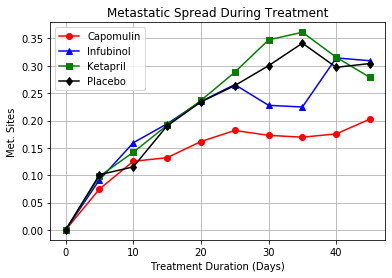

In [28]:
x_axis = [x for x in np.arange(0, 50, step=5)]

plt.plot(x_axis, meta_by_drug_df["Capomulin"], color="red", marker="o", label="Capomulin")
plt.plot(x_axis, meta_by_drug_df["Infubinol"], color="blue", marker="^", label="Infubinol")
plt.plot(x_axis, meta_by_drug_df["Ketapril"], color="green", marker="s", label="Ketapril")
plt.plot(x_axis, meta_by_drug_df["Placebo"], color="black", marker="d", label="Placebo")

plt.title("Metastatic Spread During Treatment")
plt.xlabel("Treatment Duration (Days)")
plt.ylabel("Met. Sites")

plt.legend(loc="upper left")

plt.grid()
plt.plot()

## Survival Rates

In [20]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
mouse_count = group_df["Mouse ID"].count()


# Convert to DataFrame
mouse_count_df = mouse_count.reset_index()


# Preview DataFrame
mouse_count_df.head()


,Drug,Timepoint,Mouse ID
0,Capomulin,0,25
1,Capomulin,5,25
2,Capomulin,10,25
3,Capomulin,15,24
4,Capomulin,20,23


In [ ]:
# Minor Data Munging to Re-Format the Data Frames

# Preview the Data Frame


In [26]:
# grab all drugs by mouse count for each time in timepoint and transpose the rows
mouse_times = [mouse_count_df.iloc[[x for x in np.arange(i, len(mouse_count_df), step=10)], [0,2]]
                                   for i in range(len(drugs))]
mouse_times = [item.set_index("Drug").T for item in mouse_times]

# append all times to a single DataFrame
mouse_summary_df = mouse_times[0]
for i in range(1, len(mouse_times)):
    mouse_summary_df = mouse_summary_df.append(mouse_times[i])

# create Timepoint index
mouse_summary_df["Timepoint"] = timepoint
mouse_summary_df = mouse_summary_df.set_index("Timepoint")

# preview the DataFrame
mouse_summary_df


Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17
25,22,18,18,19,18,17,14,23,19,16
30,22,16,17,18,15,15,13,23,18,15
35,22,14,12,17,15,14,10,21,16,14
40,21,14,10,15,15,12,9,20,12,14


In [ ]:
# Generate the Plot (Accounting for percentages)

# Save the Figure

# Show the Figure
plt.show()

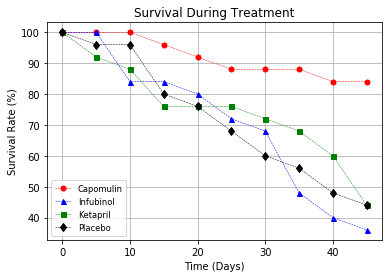

## Summary Bar Graph

In [ ]:
# Calculate the percent changes for each drug

# Display the data to confirm


Drug
Capomulin   -19.475303
Ceftamin     42.516492
Infubinol    46.123472
Ketapril     57.028795
Naftisol     53.923347
Placebo      51.297960
Propriva     47.241175
Ramicane    -22.320900
Stelasyn     52.085134
Zoniferol    46.579751
dtype: float64

In [ ]:
# Store all Relevant Percent Changes into a Tuple


# Splice the data between passing and failing drugs


# Orient widths. Add labels, tick marks, etc. 


# Use functions to label the percentages of changes


# Call functions to implement the function calls


# Save the Figure


# Show the Figure
fig.show()

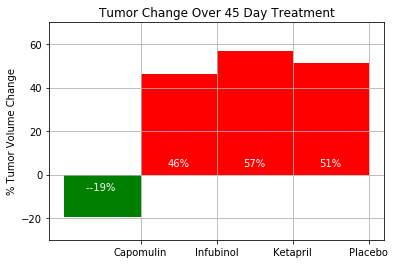